In [31]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

In [32]:
# import functions from modsim

from modsim import *

The following cell downloads the data.

In [33]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


In [34]:
np.random.seed(42)

In [35]:
time_points = np.arange(0, 240, 15)


In [36]:
paracetamol_concentration = 5 * np.exp(-0.02 * time_points) + np.random.normal(0, 0.5, len(time_points))


In [37]:
paracetamol_data = pd.DataFrame({'time': time_points, 'paracetamol': paracetamol_concentration})


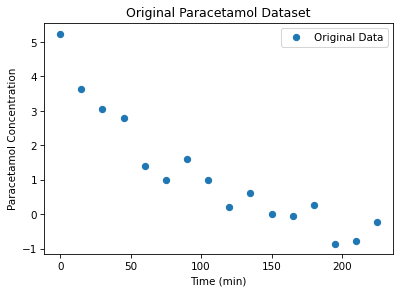

In [38]:
plt.plot(paracetamol_data['time'], paracetamol_data['paracetamol'], 'o', label='Original Data')
plt.xlabel('Time (min)')
plt.ylabel('Paracetamol Concentration')
plt.title('Original Paracetamol Dataset')
plt.legend()
plt.show()

In [39]:
paracetamol_interpolator = interp1d(paracetamol_data['time'], paracetamol_data['paracetamol'], kind='linear', fill_value="extrapolate")


In [40]:
t_0 = paracetamol_data['time'].min()
t_end = paracetamol_data['time'].max()
t_array = np.arange(t_0, t_end, 1)

In [41]:
paracetamol_simulation = paracetamol_interpolator(t_array)


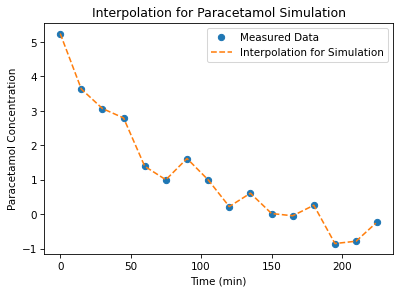

In [42]:
plt.plot(paracetamol_data['time'], paracetamol_data['paracetamol'], 'o', label='Measured Data')
plt.plot(t_array, paracetamol_simulation, label='Interpolation for Simulation', linestyle='--')
plt.xlabel('Time (min)')
plt.ylabel('Paracetamol Concentration')
plt.title('Interpolation for Paracetamol Simulation')
plt.legend()
plt.show()


In [43]:
dose_times = [60, 120, 180]

In [44]:
paracetamol_concentration_multi_dose = paracetamol_concentration.copy()


In [45]:
for dose_time in dose_times:
    dose_effect = 5 * np.exp(-0.02 * (time_points - dose_time))
    paracetamol_concentration_multi_dose += dose_effect

In [46]:
paracetamol_data_multi_dose = pd.DataFrame({'time': time_points, 'paracetamol': paracetamol_concentration_multi_dose})


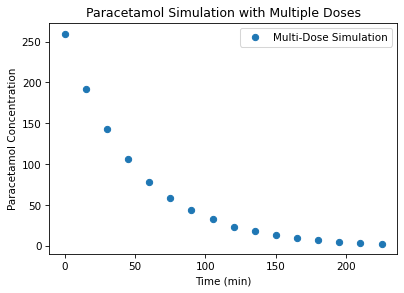

In [47]:
plt.plot(paracetamol_data_multi_dose['time'], paracetamol_data_multi_dose['paracetamol'], 'o', label='Multi-Dose Simulation')
plt.xlabel('Time (min)')
plt.ylabel('Paracetamol Concentration')
plt.title('Paracetamol Simulation with Multiple Doses')
plt.legend()
plt.show()